In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [44]:
# Stores dataset
loan = pd.read_csv('Loan.csv')
loan

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


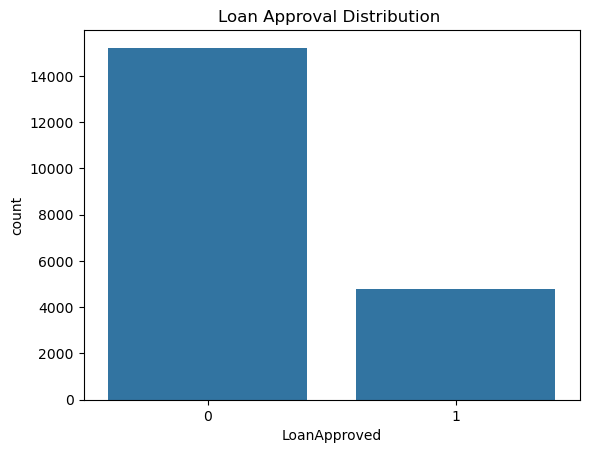

In [45]:
# Checking the distrubtion of positive to negative outcomes
sns.countplot(data=loan, x="LoanApproved")
plt.title("Loan Approval Distribution ")
plt.show()

In [46]:
# Looking for missing values in each collumn and summing the total in each.`
loan.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [47]:
loandf_majority = loan[loan['LoanApproved'] == 0] 
loandf_minority = loan[loan['LoanApproved'] == 1] 
# Upsample the minority class
loandf_minority_upsampled = loandf_minority.sample(n=len(loandf_majority), replace=True, random_state=42)
# Combine the upsampled minority class with the majority class
loandf_balanced = pd.concat([loandf_majority, loandf_minority_upsampled])


In [48]:
dataf= pd.get_dummies(loandf_balanced)
dataf.bfill(inplace=True)
dataf

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,False,False,False,True,False,False,False,False,True,False
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,False,True,False,False,False,False,True,False,False,False
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,False,False,False,False,True,False,False,True,False,False
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,False,True,False,False,False,False,False,False,True,False
6,58,51250,564,39,12741,48,0,337,0.367380,6,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,39,80516,542,13,11758,60,3,334,0.696331,4,...,False,False,False,True,False,False,False,True,False,False
3872,26,99785,498,3,16106,60,0,361,0.177807,2,...,False,False,False,False,True,False,False,False,True,False
19572,44,34670,616,21,18368,48,0,280,0.393310,7,...,False,False,True,False,False,False,False,False,False,True
10356,45,72443,571,17,13064,48,1,293,0.759004,4,...,False,False,False,False,True,False,True,False,False,False


In [49]:
# creates scaler object and normalizes the loan dataset
scaler = MinMaxScaler()
Loan_Norm = pd.DataFrame(scaler.fit_transform(dataf), columns=dataf.columns)
Loan_Norm

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.435484,0.053042,0.742547,0.360656,0.052348,0.333333,0.4,0.046358,0.385684,0.076923,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.322581,0.052534,0.772358,0.245902,0.123557,0.333333,0.2,0.155455,0.094775,0.384615,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.467742,0.054692,0.615176,0.426230,0.077064,0.222222,0.4,0.296968,0.148886,0.153846,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.645161,0.114989,0.547425,0.557377,0.189022,0.777778,0.2,0.245730,0.290933,0.153846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.645161,0.077072,0.598916,0.639344,0.050078,0.333333,0.0,0.100035,0.399829,0.461538,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,0.338710,0.139295,0.539295,0.213115,0.044649,0.444444,0.6,0.098989,0.758787,0.307692,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30436,0.129032,0.180263,0.420054,0.049180,0.068663,0.444444,0.0,0.108400,0.192963,0.153846,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
30437,0.419355,0.041821,0.739837,0.344262,0.081156,0.333333,0.0,0.080167,0.428124,0.538462,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30438,0.435484,0.122131,0.617886,0.278689,0.051862,0.333333,0.2,0.084699,0.827177,0.307692,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


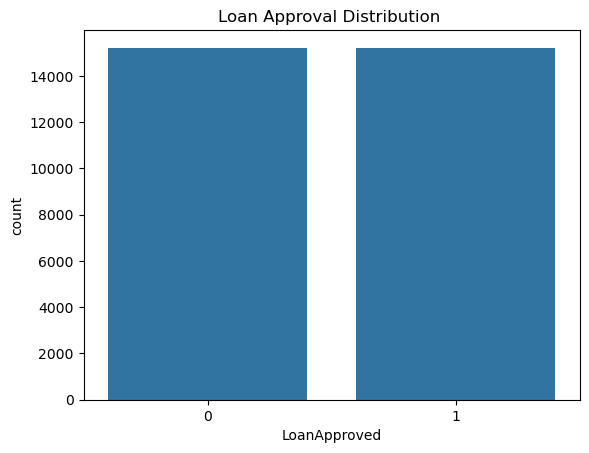

In [50]:
sns.countplot(data= loandf_balanced, x="LoanApproved")
plt.title("Loan Approval Distribution ")
plt.show()

In [51]:
numerical_features = loan.columns[(loan.dtypes == int).values | (loan.dtypes == float).values]
numerical_features

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

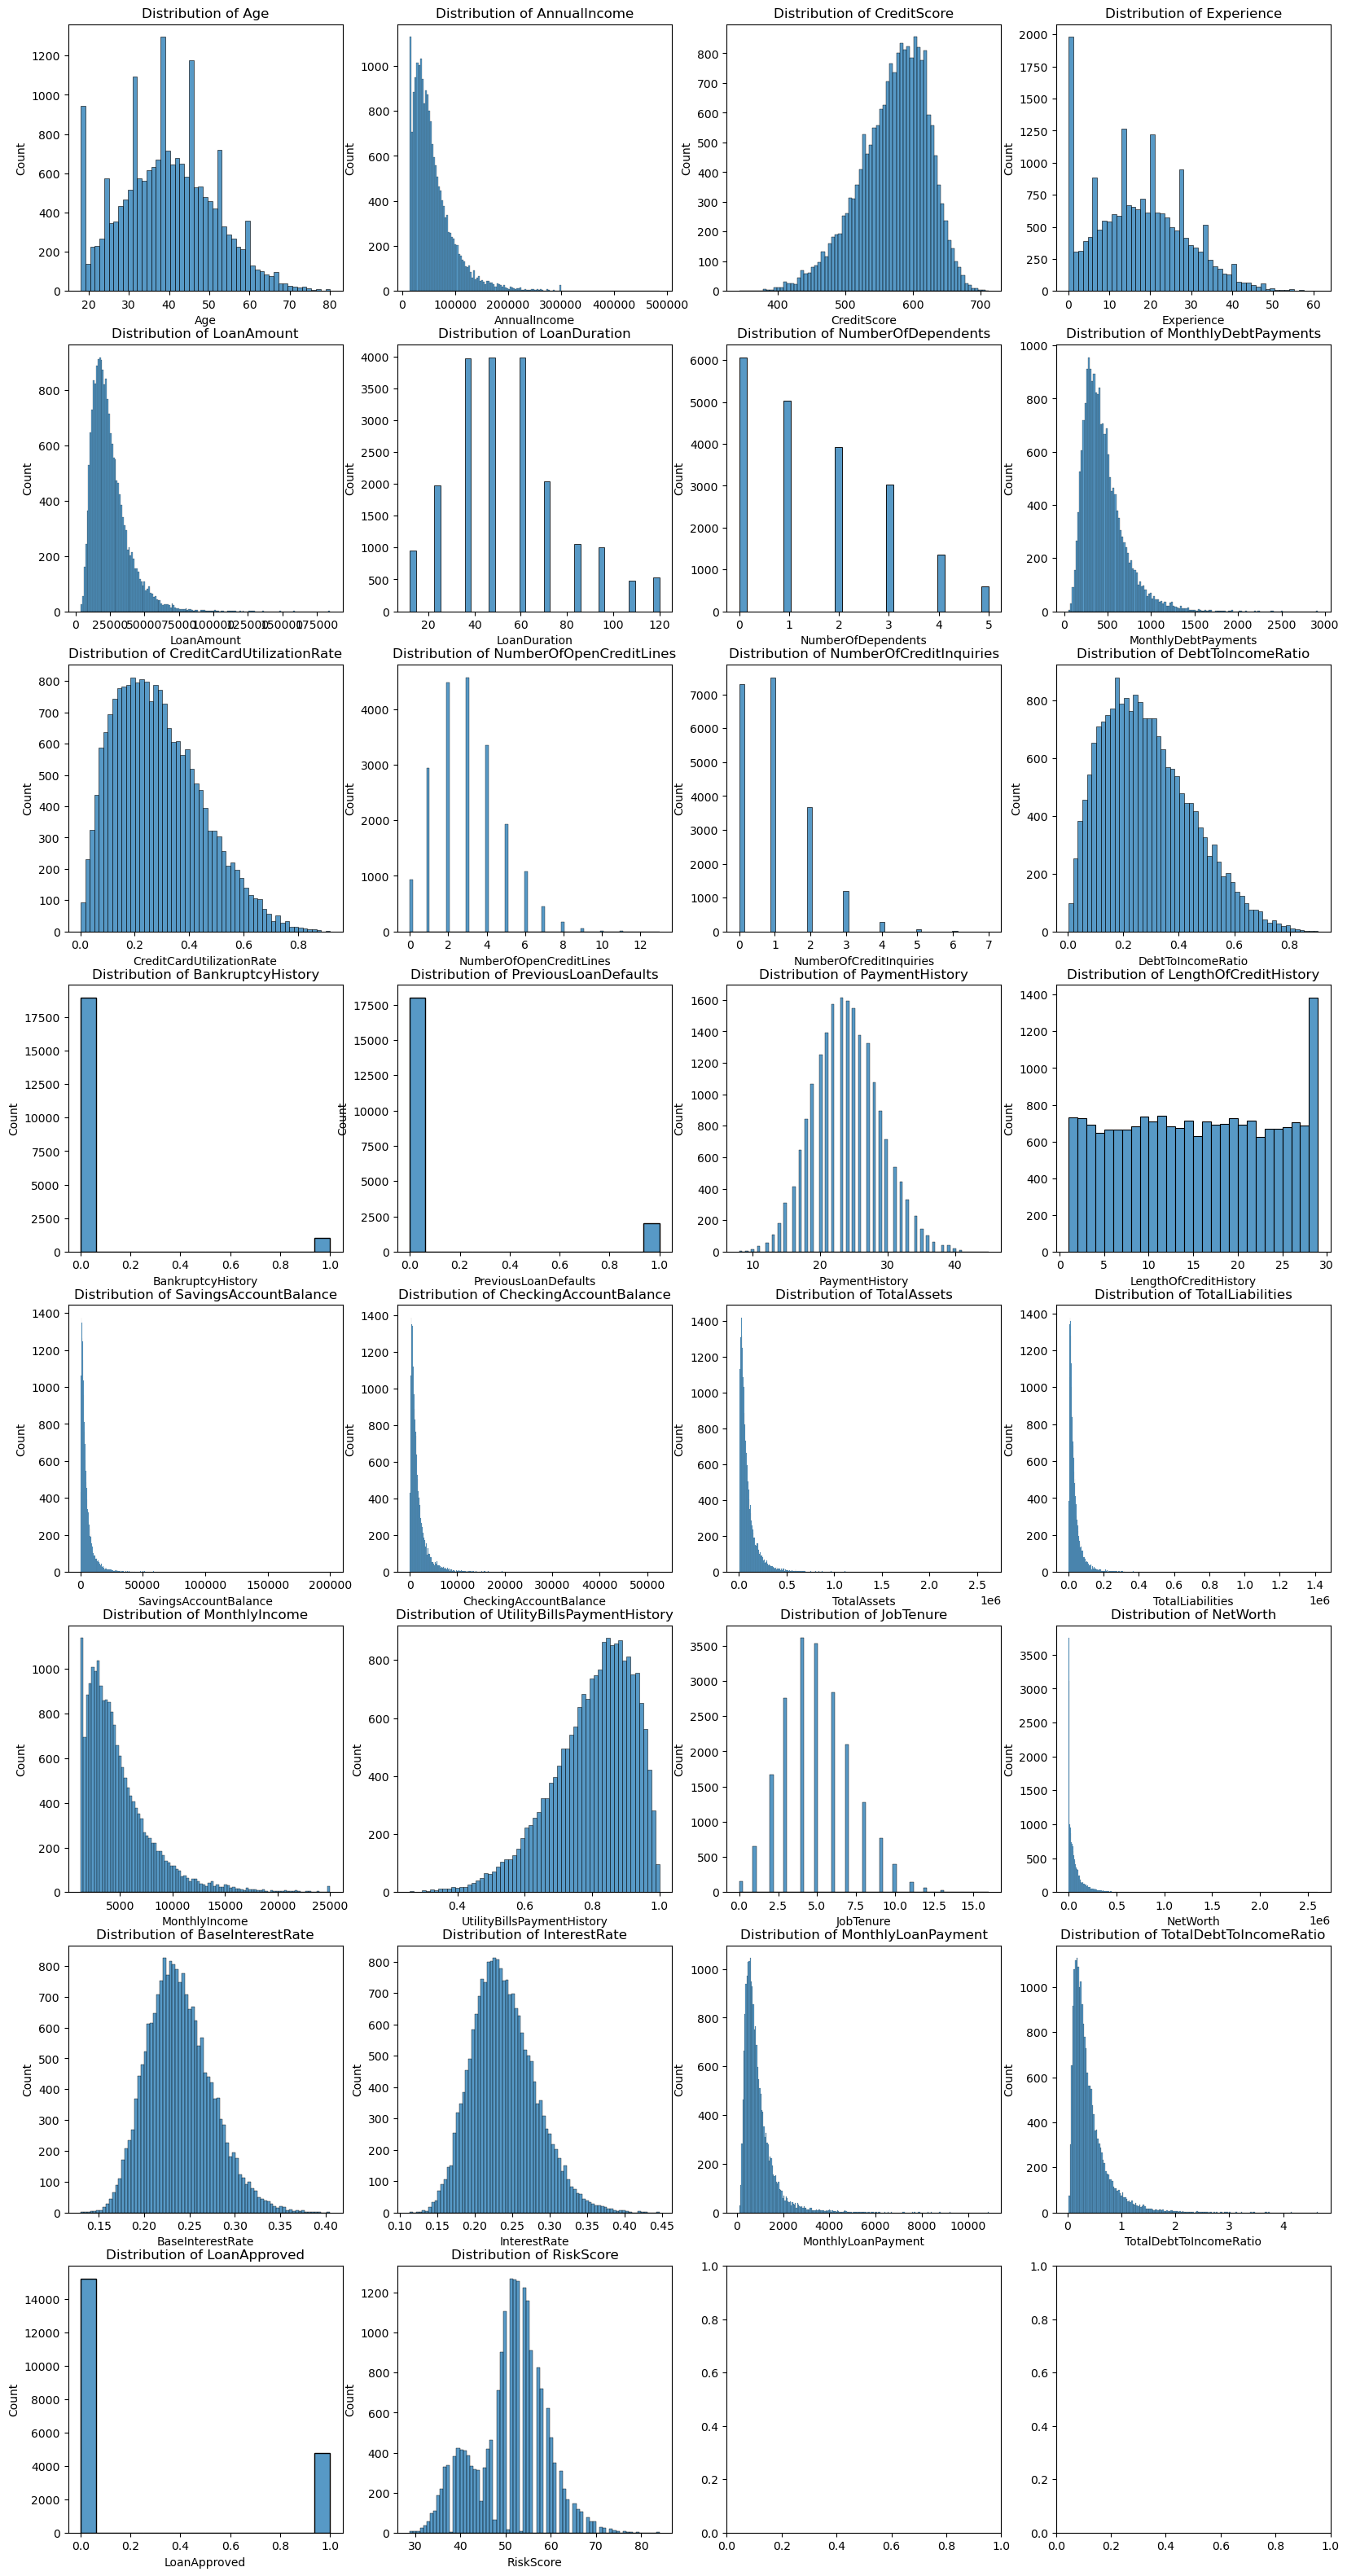

In [52]:
# Number of plots per row
plots_per_row = 4

# Calculate the number of rows needed
num_rows = (len(numerical_features) + plots_per_row - 1) // plots_per_row

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))

# Iterate through the numerical columns and create the distribution plots
for i, col in enumerate(numerical_features):
  row_idx = i // plots_per_row
  col_idx = i % plots_per_row

  sns.histplot(data=loan, x=col, ax=axes[row_idx, col_idx])
  axes[row_idx, col_idx].set_title(f'Distribution of {col}')

plt.show()


In [53]:
print(Loan_Norm.columns)

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       ...
       'MaritalStatus_Widowed', 'HomeOwnershipStatus_Mortgage',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'LoanPurpose_Auto',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object', length=19849)


In [54]:
#checking the correlation and signifance of each feature with the target feature LoanApproved
for feature in ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines','MaritalStatus_Widowed', 'HomeOwnershipStatus_Mortgage',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'LoanPurpose_Auto',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other']:
    corr, p_value = pearsonr(Loan_Norm[feature], Loan_Norm['LoanApproved'])
    print(f'Feature: {feature}, Correlation: {corr}, P-value: {p_value}')

Feature: Age, Correlation: 0.16527559519781299, P-value: 2.4196940552701367e-185
Feature: AnnualIncome, Correlation: 0.5764013170927434, P-value: 0.0
Feature: CreditScore, Correlation: 0.16456070214964175, P-value: 9.721281588643744e-184
Feature: Experience, Correlation: 0.16484914135459525, P-value: 2.1950837348160985e-184
Feature: LoanAmount, Correlation: -0.30070101402955896, P-value: 0.0
Feature: LoanDuration, Correlation: -0.11575026679250458, P-value: 2.765657888899528e-91
Feature: NumberOfDependents, Correlation: 0.0007080861783810692, P-value: 0.9016833160936707
Feature: MonthlyDebtPayments, Correlation: -0.0854042623848084, P-value: 2.192792236975356e-50
Feature: CreditCardUtilizationRate, Correlation: -0.011515437156836797, P-value: 0.04452762668608551
Feature: NumberOfOpenCreditLines, Correlation: -0.006014012895535822, P-value: 0.2940699713437882
Feature: MaritalStatus_Widowed, Correlation: -0.01622160488657916, P-value: 0.0046509671696019095
Feature: HomeOwnershipStatus_Mo

In [55]:
# NumberOfDependents,CreditCardUtilizationRate, NumberOfOpenCreditLines,MaritalStatus_Widowed, HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Own
#HomeOwnershipStatus_Rent, LoanPurpose_Auto, LoanPurpose_Debt Consolidation, LoanPurpose_Education, LoanPurpose_Home,LoanPurpose_Other [NumberOfDependents,CreditCardUtilizationRate,NumberOfOpenCreditLines]

In [56]:
Loan_Norm.drop(['NumberOfDependents','CreditCardUtilizationRate','NumberOfOpenCreditLines','LoanPurpose_Home','LoanPurpose_Debt Consolidation','LoanPurpose_Auto'], axis=1, inplace=True)
print(Loan_Norm)

            Age  AnnualIncome  CreditScore  Experience  LoanAmount  \
0      0.435484      0.053042     0.742547    0.360656    0.052348   
1      0.322581      0.052534     0.772358    0.245902    0.123557   
2      0.467742      0.054692     0.615176    0.426230    0.077064   
3      0.645161      0.114989     0.547425    0.557377    0.189022   
4      0.645161      0.077072     0.598916    0.639344    0.050078   
...         ...           ...          ...         ...         ...   
30435  0.338710      0.139295     0.539295    0.213115    0.044649   
30436  0.129032      0.180263     0.420054    0.049180    0.068663   
30437  0.419355      0.041821     0.739837    0.344262    0.081156   
30438  0.435484      0.122131     0.617886    0.278689    0.051862   
30439  0.306452      0.161557     0.552846    0.229508    0.083807   

       LoanDuration  MonthlyDebtPayments  NumberOfCreditInquiries  \
0          0.333333             0.046358                 0.285714   
1          0.333333  

In [57]:
# Split into features (X) and target variable (y)
X = Loan_Norm.drop(columns=['LoanApproved','RiskScore'])
y = Loan_Norm["LoanApproved"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_score(y_train, logreg.predict(X_train))

0.9855042706964521

In [59]:
# Evaluates the Logistic regression model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.9753613666228647
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      3100
         1.0       0.96      0.99      0.98      2988

    accuracy                           0.98      6088
   macro avg       0.98      0.98      0.98      6088
weighted avg       0.98      0.98      0.98      6088



In [60]:
train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
test_accuracy = accuracy_score(y_test, logreg.predict(X_test))
train_accuracy

0.9855042706964521

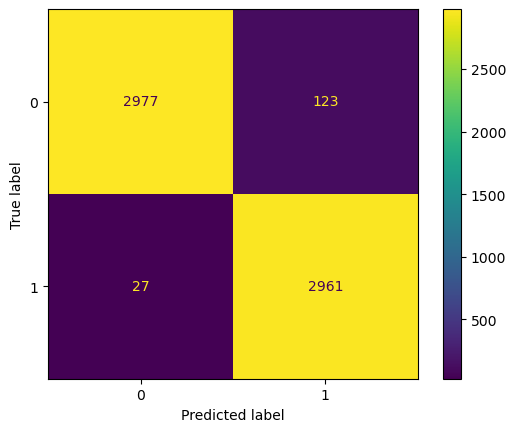

In [61]:
CM = confusion_matrix(y_test, y_pred_logreg)
cm=ConfusionMatrixDisplay(confusion_matrix=CM)
cm.plot()

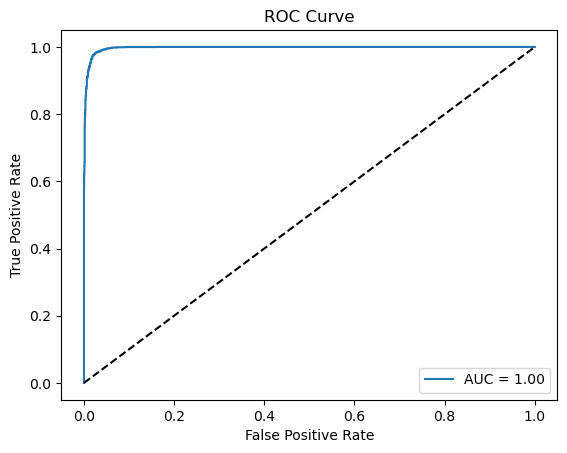

In [62]:
# Predict probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculates AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()